In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import cm
import json
import sys
import os
import glob
# make paths above 'notebooks/' visible for local imports.
# +----------------------------------------------------------------------------+
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.processing import GatherFeatureDatasets
from src.feature_selection import CustomRFECV
from src import plotting
from src.utils import select_N_one_standard_error

# Load results

In [2]:
datadir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/feature_selection_update/linear_reg/rfecvP'
proc = GatherFeatureDatasets(is_p=True)

In [3]:
feature_names = proc.get_feature_names(18, 'dist', linear_model=True)
feature_names

array(['amp_ratio_1', 'amp_ratio_2', 'amp_ratio_3', 'amp_ratio_4',
       'amp_ratio_5', 'amp_ratio_6', 'amp_ratio_7', 'amp_ratio_8',
       'amp_ratio_9', 'amp_ratio_10', 'amp_ratio_11', 'amp_ratio_12',
       'amp_ratio_13', 'amp_ratio_14', 'amp_ratio_15', 'amp_ratio_16',
       'amp_ratio_17', 'amp_ratio_18', 'amp_1', 'amp_2', 'amp_3', 'amp_4',
       'amp_5', 'amp_6', 'amp_7', 'amp_8', 'amp_9', 'amp_10', 'amp_11',
       'amp_12', 'amp_13', 'amp_14', 'amp_15', 'amp_16', 'amp_17',
       'amp_18', 'signal_dominant_frequency', 'signal_dominant_amplitude',
       'noise_max_amplitude', 'signal_max_amplitude', 'signal_variance',
       'noise_variance', 'source_depth_km',
       'source_receiver_distance_logkm',
       'source_receiver_back_azimuth_sine'], dtype='<U33')

In [4]:
feature_plot_names = proc.get_feature_plot_names(18, 'dist')
feature_plot_names

array(['ratio 1', 'ratio 2', 'ratio 3', 'ratio 4', 'ratio 5', 'ratio 6',
       'ratio 7', 'ratio 8', 'ratio 9', 'ratio 10', 'ratio 11',
       'ratio 12', 'ratio 13', 'ratio 14', 'ratio 15', 'ratio 16',
       'ratio 17', 'ratio 18', 'amp. 1', 'amp. 2', 'amp. 3', 'amp. 4',
       'amp. 5', 'amp. 6', 'amp. 7', 'amp. 8', 'amp. 9', 'amp. 10',
       'amp. 11', 'amp. 12', 'amp. 13', 'amp. 14', 'amp. 15', 'amp. 16',
       'amp. 17', 'amp. 18', 'sig. dom. freq.', 'sig. dom. amp.',
       'noise max. amp.', 'sig. max. amp.', 'sig. var.', 'noise var.',
       'depth', 'distance', 'back az.'], dtype='<U15')

In [5]:
with open(os.path.join(datadir, 'all.LR.DT.rel.rfecv.json')) as fp:
    rfecv_results_dict = json.load(fp)

In [6]:
with open(os.path.join(datadir, 'all.LR.DT.rel.rfe.full.json')) as fp:
    full_rfe_results_dict = json.load(fp)

# Results summary

In [7]:
plotting.set_default_fontsizes()

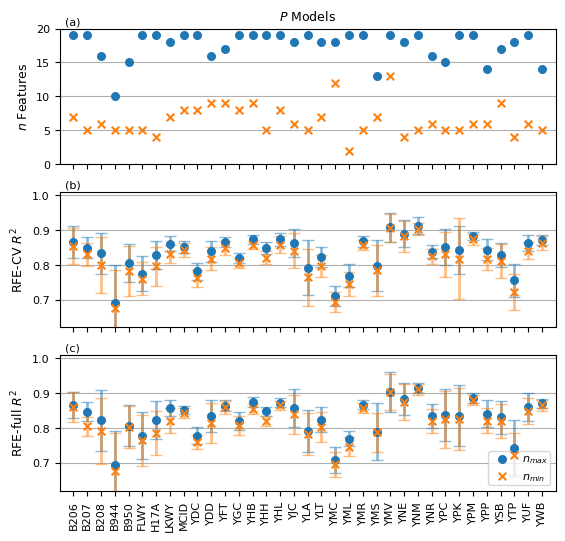

In [8]:
plotting.plot_rfecv_score_summary(rfecv_results_dict, 
                                    full_rfe_results_dict,
                                    capsize=4,
                                    score_ylims=[0.62, 1.01],
                                    grids=True,
                                    elinewidth=2,
                                    s=30,
                                    plot_N=True,
                                    N_ylims=[0, 20],
                                    figsize=(6.4, 6),
                                    #savefigname='../figures/RFE_summary_P.png',
                                    title='$\it{P}$ Models')

# RFECV Results - Best *N*

In [9]:
# Save without filtering out zero rows
best_feat_cnts_df = CustomRFECV.make_feature_count_df(rfecv_results_dict, 
                                          feature_plot_names,
                                          CustomRFECV.get_rfecv_important_feature_counts,
                                          filter_zeros=False)
best_feat_cnts_df.to_csv(os.path.join(datadir, 'feature.importance.rfecv.best.csv'))

best_feat_cnts_df = best_feat_cnts_df.loc[~(best_feat_cnts_df==0).all(axis=1)]

In [10]:
best_feat_cnts_df

,B206,B207,B208,B944,B950,FLWY,H17A,LKWY,MCID,YDC,...,YNM,YNR,YPC,YPK,YPM,YPP,YSB,YTP,YUF,YWB
Feature,,,,,,,,,,,,,,,,,,,,,
ratio 1,0,0,9,6,0,9,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ratio 2,0,0,5,0,0,0,4,8,0,0,...,0,0,2,5,0,0,5,6,3,0
ratio 3,0,0,3,1,0,9,3,6,0,0,...,0,0,0,2,0,2,6,6,0,0
ratio 4,6,6,0,0,0,8,0,5,10,0,...,0,0,0,3,0,3,8,8,9,0
ratio 5,0,0,0,4,0,0,0,6,9,0,...,0,0,8,1,9,1,0,8,5,0
ratio 6,0,6,0,0,0,3,2,0,10,10,...,0,9,8,2,9,4,6,0,10,4
ratio 7,5,1,0,0,0,3,3,0,5,8,...,0,0,1,3,1,5,3,1,7,4
ratio 8,7,4,0,1,6,9,2,0,6,9,...,7,2,1,1,0,1,0,0,3,4
ratio 9,7,2,0,4,0,0,4,1,0,10,...,3,9,0,5,4,0,0,3,3,2


In [11]:
best_feat_summary_df = CustomRFECV.get_feature_cnts_across_stats(best_feat_cnts_df)
best_feat_summary_df

,Feature,cnt
43,distance,350
42,depth,332
44,back az.,328
37,sig. dom. amp.,309
40,sig. var.,308
39,sig. max. amp.,271
18,amp. 1,256
19,amp. 2,240
21,amp. 4,238
20,amp. 3,218


In [12]:
best_feat_summary_df[best_feat_summary_df.cnt > best_feat_summary_df['cnt'].quantile(0.75)]

,Feature,cnt
43,distance,350
42,depth,332
44,back az.,328
37,sig. dom. amp.,309
40,sig. var.,308
39,sig. max. amp.,271
18,amp. 1,256
19,amp. 2,240
21,amp. 4,238
20,amp. 3,218


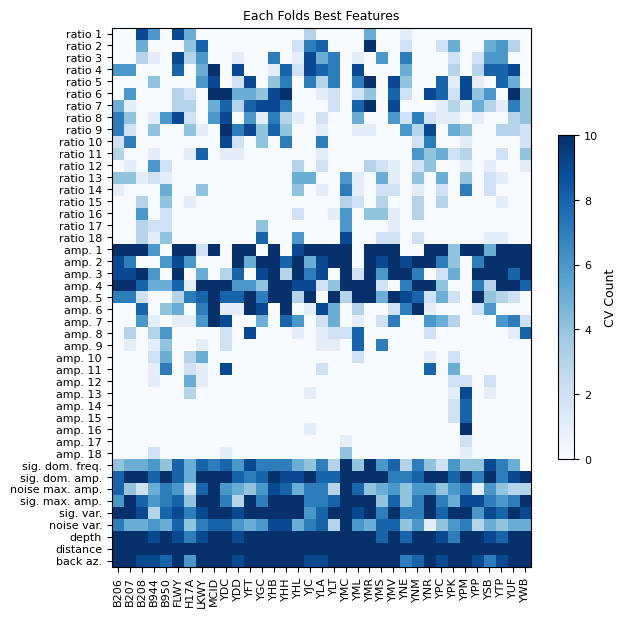

In [13]:
plotting.plot_rfecv_feature_heatmap(best_feat_cnts_df,
                                    figsize=(7, 7),
                                    title='Each Folds Best Features')

# RFECV Results 1 St. Error *N*

In [14]:
# Save without filtering out zero rows
oste_feat_cnts_df = CustomRFECV.make_feature_count_df(rfecv_results_dict, 
                      feature_plot_names,
                      CustomRFECV.get_rfecv_important_feature_counts,
                      oste_feats=True,
                      filter_zeros=False)
oste_feat_cnts_df.to_csv(os.path.join(datadir, 'feature.importance.rfecv.oste.csv'))
oste_feat_cnts_df = oste_feat_cnts_df.loc[~(oste_feat_cnts_df==0).all(axis=1)]

In [15]:
oste_feat_summary_df = CustomRFECV.get_feature_cnts_across_stats(oste_feat_cnts_df)
oste_feat_summary_df

,Feature,cnt
41,distance,339
17,amp. 1,242
18,amp. 2,202
38,sig. var.,140
40,depth,125
42,back az.,125
19,amp. 3,118
35,sig. dom. amp.,104
20,amp. 4,97
21,amp. 5,96


In [16]:
oste_feat_summary_df[oste_feat_summary_df.cnt > oste_feat_summary_df['cnt'].quantile(0.75)]

,Feature,cnt
41,distance,339
17,amp. 1,242
18,amp. 2,202
38,sig. var.,140
40,depth,125
42,back az.,125
19,amp. 3,118
35,sig. dom. amp.,104
20,amp. 4,97
21,amp. 5,96


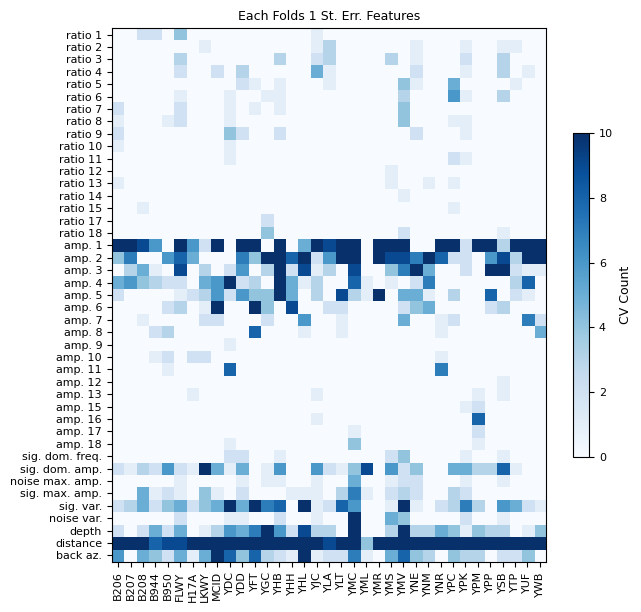

In [17]:
plotting.plot_rfecv_feature_heatmap(oste_feat_cnts_df,
                                    figsize=(7, 7),
                                    title='Each Folds 1 St. Err. Features')

# Best *N* Selected Features from Full Training Sets

In [18]:
selected_best_features_df = CustomRFECV.make_feature_count_df(full_rfe_results_dict, 
                                          feature_plot_names,
                                          CustomRFECV.get_selected_feature_counts,
                                          filter_zeros=False)
selected_best_features_df.to_csv(os.path.join(datadir, 'feature.importance.rfe.full.best.csv'))
selected_best_features_df = selected_best_features_df.loc[~(selected_best_features_df==0).all(axis=1)]

In [19]:
sel_feat_summary_df = CustomRFECV.get_feature_cnts_across_stats(selected_best_features_df)
sel_feat_summary_df

,Feature,cnt
41,depth,35
42,distance,35
43,back az.,34
38,sig. max. amp.,34
36,sig. dom. amp.,33
39,sig. var.,32
40,noise var.,31
35,sig. dom. freq.,29
37,noise max. amp.,27
18,amp. 1,27


In [20]:
sel_feat_summary_df[sel_feat_summary_df.cnt > sel_feat_summary_df['cnt'].quantile(0.75)]

,Feature,cnt
41,depth,35
42,distance,35
43,back az.,34
38,sig. max. amp.,34
36,sig. dom. amp.,33
39,sig. var.,32
40,noise var.,31
35,sig. dom. freq.,29
37,noise max. amp.,27
18,amp. 1,27


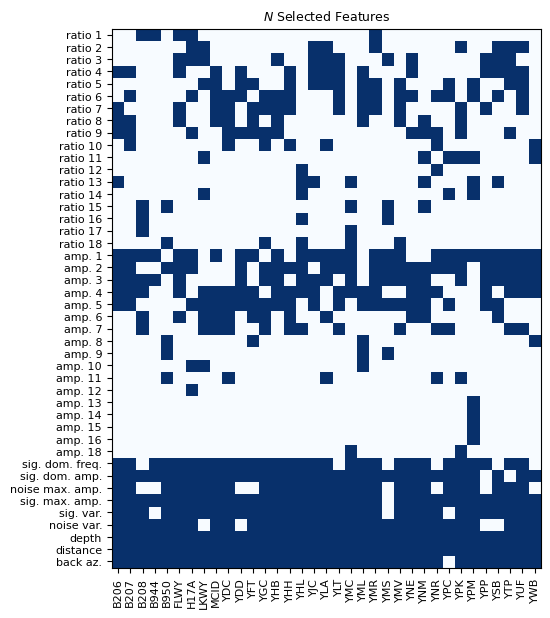

In [21]:
plotting.plot_rfecv_feature_heatmap(selected_best_features_df, 
                                    plot_colorbar=False,
                                    fontsize=8,
                                    figsize=(7, 7),
                                    title='$\it{N}$ Selected Features')

# 1 St. Err. *N* Selected Features from Full Training Sets

In [22]:
selected_oste_features_df = CustomRFECV.make_feature_count_df(full_rfe_results_dict, 
                                          feature_plot_names,
                                          CustomRFECV.get_selected_feature_counts,
                                          oste_feats=True,
                                          filter_zeros=False)
selected_oste_features_df.to_csv(os.path.join(datadir, 'feature.importance.rfe.full.oste.csv'))
selected_oste_features_df = selected_oste_features_df.loc[~(selected_oste_features_df==0).all(axis=1)]                                         

In [23]:
sel_oste_feat_summary_df = CustomRFECV.get_feature_cnts_across_stats(selected_oste_features_df)
sel_oste_feat_summary_df

,Feature,cnt
27,distance,35
8,amp. 1,25
9,amp. 2,22
26,depth,22
28,back az.,16
24,sig. var.,16
10,amp. 3,14
12,amp. 5,14
21,sig. dom. amp.,11
11,amp. 4,10


In [24]:
sel_oste_feat_summary_df[sel_oste_feat_summary_df.cnt > sel_oste_feat_summary_df['cnt'].quantile(0.75)]

,Feature,cnt
27,distance,35
8,amp. 1,25
9,amp. 2,22
26,depth,22
28,back az.,16
24,sig. var.,16


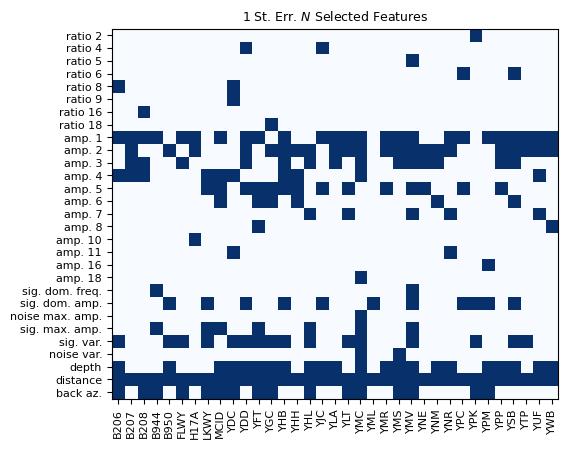

In [25]:
plotting.plot_rfecv_feature_heatmap(selected_oste_features_df, 
                                    plot_colorbar=False,
                                    title='1 St. Err. $\it{N}$ Selected Features')